# Parallel performance of a simple Python code
Here is a summary of the results from running the `mpi.py´ program.

In [11]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,6]

In [1]:
# Lars
nprocL = [256, 128, 64, 32, 16, 320]
tsecL = [1.253, 1.566, 2.224, 3.567, 6.411, 1.071]

In [20]:
# Ville
nprocV = [400, 256, 128, 64, 32, 16, 8, 4, 2]
tsecV = [0.972, 1.249, 1.569, 2.260, 3.633, 6.221, 11.036, 19.732, 47.045]

In [21]:
# Isabel
nprocI = [32, 64, 100, 100, 128, 200, 250, 256, 320, 320]
tsecI = [4.001, 2.248, 1.590, 1.589, 1.606, 1.142, 1.211, 1.287, 1.083, 1.075]

In [22]:
# Aleksi
nprocA = [8, 16, 32, 64, 128, 256, 400]
tsecA = [10.762, 6.265, 3.550, 2.229, 1.563, 1.266, 0.951]

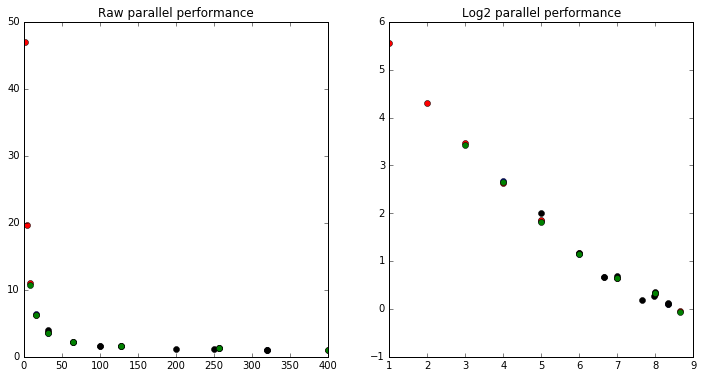

In [25]:
# Convert to NumPy arrays
nprocL = np.array(nprocL)
tsecL = np.array(tsecL)
nprocV = np.array(nprocV)
tsecV = np.array(tsecV)
nprocI = np.array(nprocI)
tsecI = np.array(tsecI)
nprocA = np.array(nprocA)
tsecA = np.array(tsecA)

# Plot data
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(nprocL, tsecL, 'bo')
ax1.plot(nprocV, tsecV, 'ro')
ax1.plot(nprocI, tsecI, 'ko')
ax1.plot(nprocA, tsecA, 'go')
ax1.set_title('Raw parallel performance')
ax2.plot(np.log2(nprocL), np.log2(tsecL), 'bo')
ax2.plot(np.log2(nprocV), np.log2(tsecV), 'ro')
ax2.plot(np.log2(nprocI), np.log2(tsecI), 'ko')
ax2.plot(np.log2(nprocA), np.log2(tsecA), 'go')
ax2.set_title('Log2 parallel performance')